# Проект: ООО «Так закаляем сталь» (Промышленность)

**Описание компании:** Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. 

**Цель:** Нам предстоит построить модель, которая предскажет температуру стали.

# Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

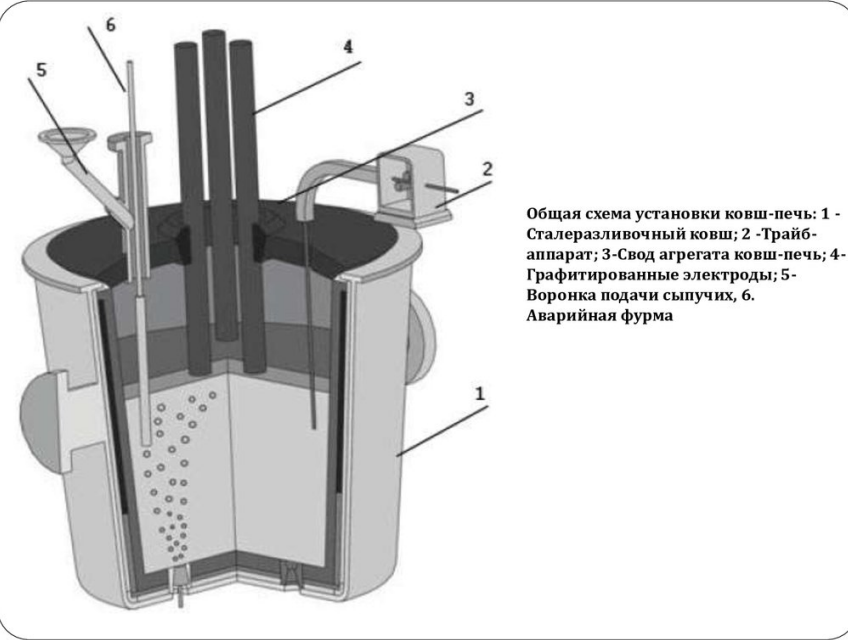

# Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

# Используемые библиотеки

    1. Scikit-learn; 
    2. Pandas;
    3. Numpy;
    4. CatBoostRegressor; 
    5. LinearRegression;
    6. Seaborn (Matplotlib)

# План работы:

1. Исследование данных и составления плана
2. Уточнение задачи
3. Предобработка данных и построение модели
4. Отчет

****

### 1. Исследовательский анализ (EDA)

# Импортируем нужные библиотеки

In [1]:
# импортируем нужные библиотеки и будем обращаться к ним через принятные сокращения

!pip install pandas-profiling
!pip install shap

from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from pandas_profiling import ProfileReport
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn import svm

import numpy as np
import shap
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as plt
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set()

     |████████████████████████████████| 324 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 344 kB 21.0 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 53.5 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 97.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 84.6 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=d15d828fb65712ac3059b2e8566d61745004cc2b7adf95d666020c8ceef77957
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
     |████████████████████████████████| 572 kB 1.2 MB/s eta 0:00:01


/tmp/ipykernel_48/1134068098.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Через конструкцию try-except прочтем файлы и сохраним их в переменные 

In [2]:
# через конструкцию try-except прочтем файл и сохраним ее в переменную df
# ЛОКАЛЬНО
try:
    df_arc = pd.read_csv(r'C:\Users\vireq\Downloads\final_steel\data_arc.csv')
    df_bulk = pd.read_csv(r'C:\Users\vireq\Downloads\final_steel\data_bulk.csv')
    df_bulk_time = pd.read_csv(r'C:\Users\vireq\Downloads\final_steel\data_bulk_time.csv')
    df_gas = pd.read_csv(r'C:\Users\vireq\Downloads\final_steel\data_gas.csv')
    df_temp = pd.read_csv(r'C:\Users\vireq\Downloads\final_steel\data_temp.csv')
    df_wire = pd.read_csv(r'C:\Users\vireq\Downloads\final_steel\data_wire.csv')
    df_wire_time = pd.read_csv(r'C:\Users\vireq\Downloads\final_steel\data_wire_time.csv')
except FileNotFoundError:
    df_arc = pd.read_csv(r'/datasets/final_steel/data_arc.csv')
    df_bulk = pd.read_csv(r'/datasets/final_steel/data_bulk.csv')
    df_bulk_time = pd.read_csv(r'/datasets/final_steel/data_bulk_time.csv')
    df_gas = pd.read_csv(r'/datasets/final_steel/data_gas.csv')
    df_temp = pd.read_csv(r'/datasets/final_steel/data_temp.csv')
    df_wire = pd.read_csv(r'/datasets/final_steel/data_wire.csv')
    df_wire_time = pd.read_csv(r'/datasets/final_steel/data_wire_time.csv')
    # ТРЕНАЖЕР
    # print("FileNotFoundError: Проверьте корректность пути к файлу или наличие самого файла в каталоге!")

# Изучим количество пропусков и выведем первые 5 строк для каждого датасета

****

# Данные об электродах (df_arc)

In [3]:
for i in df_arc.columns:
    print(i, df_arc[i].isna().sum())

key 0
Начало нагрева дугой 0
Конец нагрева дугой 0
Активная мощность 0
Реактивная мощность 0


In [4]:
df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


# Данные о подаче сыпучих материалов - объём (df_bulk)

In [5]:
for i in df_bulk.columns:
    print(i, df_bulk[i].isna().sum())

key 0
Bulk 1 2877
Bulk 2 3107
Bulk 3 1831
Bulk 4 2115
Bulk 5 3052
Bulk 6 2553
Bulk 7 3104
Bulk 8 3128
Bulk 9 3110
Bulk 10 2953
Bulk 11 2952
Bulk 12 679
Bulk 13 3111
Bulk 14 323
Bulk 15 881


In [6]:
df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


# Данные о подаче сыпучих материалов время (df_bulk_time)

In [7]:
for i in df_bulk_time.columns:
    print(i, df_bulk_time[i].isna().sum())

key 0
Bulk 1 2877
Bulk 2 3107
Bulk 3 1831
Bulk 4 2115
Bulk 5 3052
Bulk 6 2553
Bulk 7 3104
Bulk 8 3128
Bulk 9 3110
Bulk 10 2953
Bulk 11 2952
Bulk 12 679
Bulk 13 3111
Bulk 14 323
Bulk 15 881


In [8]:
df_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


# Данные о продувке сплава газом (df_gas)

In [9]:
for i in df_gas.columns:
    print(i, df_gas[i].isna().sum())

key 0
Газ 1 0


In [10]:
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


# Результаты измерения температуры (df_temp)

In [11]:
for i in df_temp.columns:
    print(i, df_temp[i].isna().sum())

key 0
Время замера 0
Температура 2901


In [12]:
df_temp.tail()

,key,Время замера,Температура
15902,3241,2019-09-01 04:03:30,1586.0
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN
15906,3241,2019-09-01 04:38:08,NaN


# Данные о проволочных материалах объём (df_wire)

In [13]:
for i in df_wire.columns:
    print(i, df_wire[i].isna().sum())

key 0
Wire 1 26
Wire 2 2002
Wire 3 3018
Wire 4 3067
Wire 5 3080
Wire 6 3008
Wire 7 3070
Wire 8 3062
Wire 9 3052


In [14]:
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Данные о проволочных материалах - время (df_wire_time)

In [15]:
for i in df_wire_time.columns:
    print(i, df_wire_time[i].isna().sum())

key 0
Wire 1 26
Wire 2 2002
Wire 3 3018
Wire 4 3067
Wire 5 3080
Wire 6 3008
Wire 7 3070
Wire 8 3062
Wire 9 3052


In [16]:
df_wire_time.tail()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,2019-09-01 04:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Визуализируем наши датасеты

****

# Данные об электродах (df_arc)

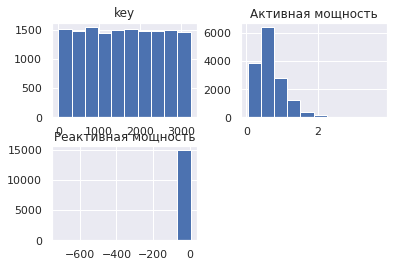

In [17]:
df_arc.hist();

In [18]:
df_arc['Реактивная мощность'].describe()

count    14876.000000
mean         0.452592
std          5.878702
min       -715.504924
25%          0.290991
50%          0.415962
75%          0.637371
max          2.676388
Name: Реактивная мощность, dtype: float64

# Данные о подаче сыпучих материалов - объём (df_bulk)

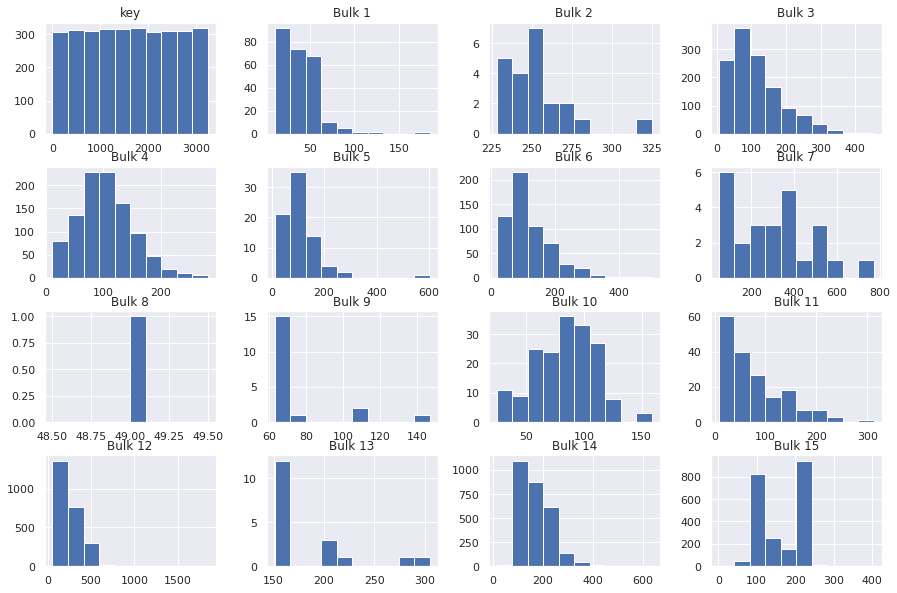

In [19]:
df_bulk.hist(figsize=(15, 10));

# HeatMap данных о подаче сыпучих материалов(получено с ProfileReport)

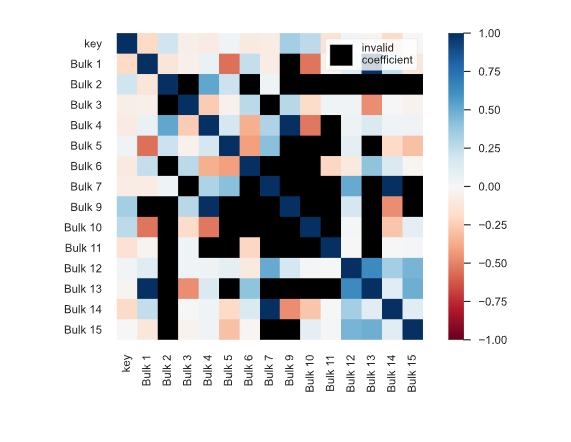

# Данные о подаче сыпучих материалов - время (df_bulk_time)

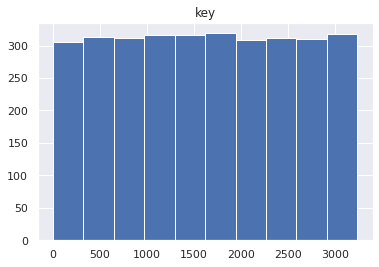

In [20]:
df_bulk_time.hist();

# Данные о продувке сплава газом (df_gas)

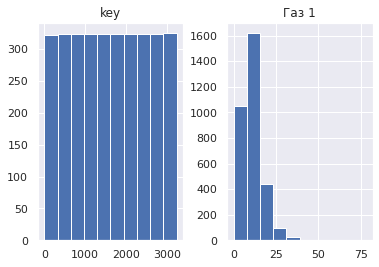

In [21]:
df_gas.hist();

# Результаты измерения температуры (df_temp)

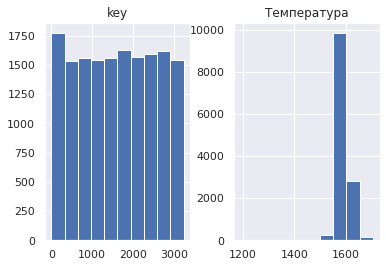

In [22]:
df_temp.hist();

# Данные о проволочных материалах - объём (df_wire)

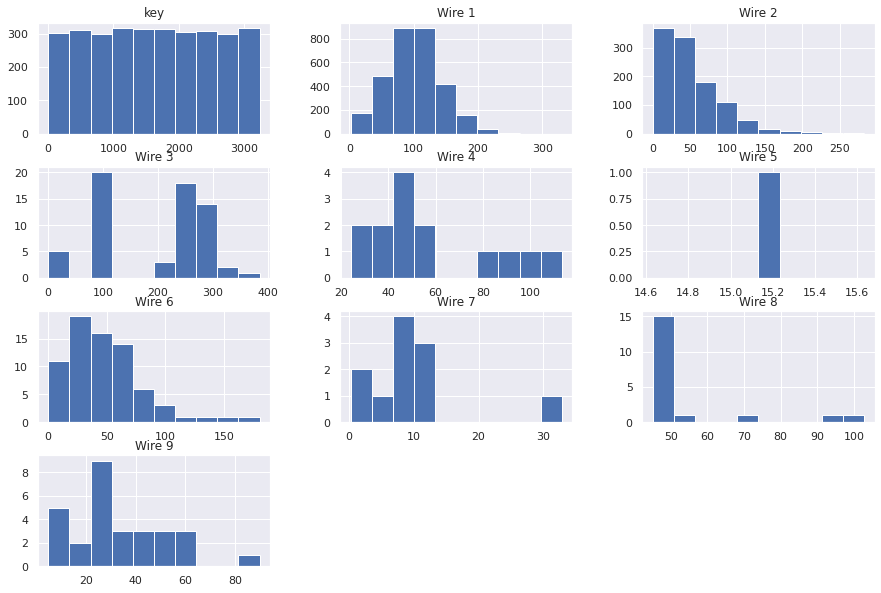

In [23]:
df_wire.hist(figsize=(15, 10));

# HeatMap данных о проволочных материалах (получено с ProfileReport)

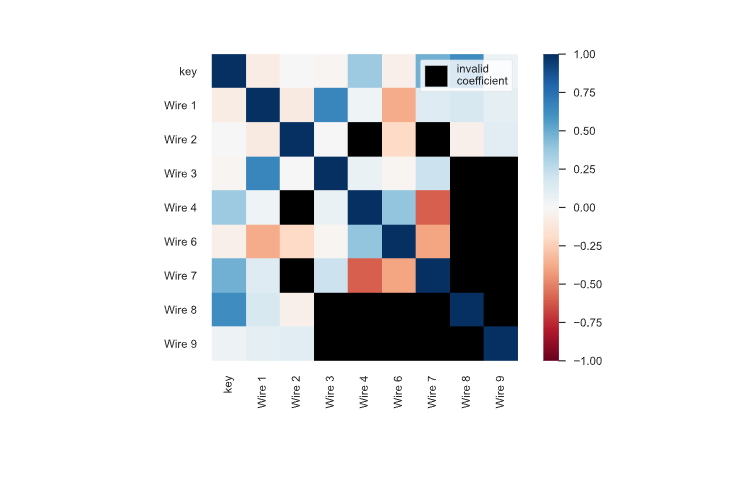

# Данные о проволочных материалах - время (df_wire_time)

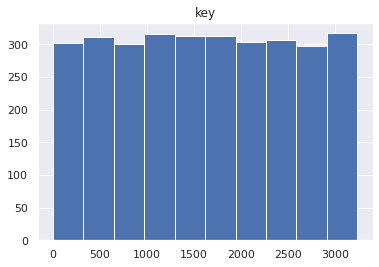

In [24]:
df_wire_time.hist();

****

# Выводы по исследовательскому анализу данных

1. В датасете об электродах было выявлено, что признак `Реактивная мощность` в **целом сильно коррелирует** с признаком `Активная мощность`, а также сам признак содержит выброс
2. В датасете о проволочных материалах обнаружили, что признаки `Wire` по распределениями отличаеются, но более всех на их фоне **выделяется признак 'Wire 5'**
3. В датасете об **об электродах нет пропусков**, также в датасете **о продувке сплава газом нет пропусков**
4. В датасете **о подаче сыпучих материалов (время) были обнаружены аномалии**, - то есть тип некорретен у большинства признаков, вместо времени встречается числовое значение
5. **В датасетах встречаются различные типы признаков**, часть датасетов связано с другим по признаку - время и потенциально может быть соединен **по признаку 'key' в качестве внешнего ключа**
6. В потенциальном **целевом признаке кол-во пропусков достаточно большое**
7. В датасетах  о проволочных материалах (объем и время) было обнаружено, что признак `'Wire 1' имеет наименьшее количество пропусков`
8. **Данных достаточно мало**, - было бы более оптимально, если бы их было больше, но главное, что в данных достаточно большое количество пропусков



**Примечание:** ProfileReport использовался в целях быстрого изучения особенностей в каждом отдельном датасете (df_wire, df_bulk)

****

****

# Примерный план решения задачи

1. После предобработки (избавление от пропусков и создания новых фичей по необходимости) данных следует подготовить тренировочную и тестовую выборки и по необходимости стандартизировать признаки и убрать ненужные, выберем соотношение **75:25** - чтобы для теста использовать 25 % наших данных

2. Следует ввести **baseline** (по среднему) модель, с целью сравненения ее метрики с более продвинутыми моделями регрессиями (**CatBoostRegressor**, **LinearRegressor**). В качестве метрики будет использоваться **MAE**. Если baseline модель будет давать лучшую оценку в сравнении, то следует задуматься об выборе ее в качестве более простого алгоритма (модели)

3. Следует провести **кросс-валидацию** (**GridSearch**) с целью отбора гиперпараметров для модели и отбора лучшей модели

4. Провести **тестирование** отобранной лучшей модели и тем самым проверить ее на адекватность 
5. **Предоставить финальный отчет** об проекте с конечными выводами


**Примечание:** В качестве выбранной метрики для оценки качества моделей, можно парралельно смотреть на другую метрику - MSE

****

### 2. Предобработка данных

### Заменим наши пропуски на "0" - так как обоснование этому то, что данные материалы не добавлялись или элемент не использовался 

In [25]:

df_wire = df_wire.fillna(0)

df_bulk = df_bulk.fillna(0)

df_temp = df_temp.fillna(0)

<div class="alert alert-dark">
<b> Комментарий студента 2</b> Значит я правильно понял и обосновал замену на '0'! Убрал замену в датасете газа. 
</div>

### Удалим выброс из признака "Реактивная мощность"

In [26]:
df_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


In [27]:
df_arc = df_arc.query("`Реактивная мощность` > 0")

<div class="alert alert-dark">
<b> Комментарий студента 2</b> Решил не удалять данный признак, - думаю исхожу из того, что данные не стоит терять, по крайне мере это не приведет к "проклятью размерности данных"
</div>

### Сгрупируем наш датасет df_arc

In [29]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14875 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14875 non-null  int64  
 1   Начало нагрева дугой  14875 non-null  object 
 2   Конец нагрева дугой   14875 non-null  object 
 3   Активная мощность     14875 non-null  float64
 4   Реактивная мощность   14875 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 697.3+ KB


In [30]:
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'] ,  format='%Y-%m-%d %H:%M:%S')

In [31]:
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'] ,  format='%Y-%m-%d %H:%M:%S')

In [32]:
df_arc['Длительность'] = (df_arc['Конец нагрева дугой'] - df_arc['Начало нагрева дугой'])

In [33]:
df_arc['Работа'] = df_arc['Длительность'] * np.sqrt((df_arc['Активная мощность']**2) + (df_arc['Реактивная мощность']**2))

In [34]:
df_arc = df_arc.groupby(['key']).agg({'Активная мощность': 'mean', 'Реактивная мощность': 'mean', 'Длительность': 'sum','Работа': 'sum'})

In [35]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Активная мощность    3214 non-null   float64        
 1   Реактивная мощность  3214 non-null   float64        
 2   Длительность         3214 non-null   timedelta64[ns]
 3   Работа               3214 non-null   timedelta64[ns]
dtypes: float64(2), timedelta64[ns](2)
memory usage: 125.5 KB


In [36]:
df_arc

,Активная мощность,Реактивная мощность,Длительность,Работа
key,,,,
1,0.975629,0.636648,0 days 00:18:18,0 days 00:24:02.377753711
2,0.763150,0.499528,0 days 00:13:31,0 days 00:14:41.233565361
3,0.505176,0.319815,0 days 00:10:55,0 days 00:08:45.066776704
4,0.802313,0.515074,0 days 00:12:21,0 days 00:13:16.911309030
5,0.836793,0.563161,0 days 00:14:29,0 days 00:19:59.137957652
...,...,...,...,...
3237,0.786493,0.565692,0 days 00:15:09,0 days 00:15:58.336235865
3238,0.702176,0.560394,0 days 00:09:06,0 days 00:09:15.867369541
3239,0.583344,0.388952,0 days 00:20:16,0 days 00:16:53.067719295


<div class="alert alert-dark">
<b> Комментарий студента 2</b> То есть моя изначальная группировка верная, однако я не понимаю, а почему можно группировать разные признаки и почему это корретно (полезно)? 
</div>

### Сгрупируем наш датасет df_temp

In [37]:
df_temp = df_temp.groupby(['key']).agg(first = ('Температура', 'first'),  last = ('Температура', 'last'))
df_temp

,first,last
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
3237,1569.0,0.0
3238,1584.0,0.0
3239,1598.0,0.0


<div class="alert alert-dark">
<b> Комментарий студента 2</b> Надеюсь правильно понял, что стоит так сделать
</div>

### Сгрупируем наш датасет df_gas

<div class="alert alert-dark">
<b> Комментарий студента 2</b> Вот здесь я не до понял. Если у нас признаков практически идентичных много, то какой выбрать в качестве '.agg(target_temp = ('Wire 1', 'count'))' ? Или можно все перечислить Wire 1, Wire 2... И то же самое с Bulk 1, Bulk 2...
</div>

### Объединим наши датасеты

In [38]:
df = df_arc\
.merge(df_bulk,  how='inner', on='key')\
.merge(df_temp,  how='inner', on='key')\
.merge(df_wire,  how='inner', on='key')\
.merge(df_gas,   how='inner', on='key')\
.reset_index()

In [39]:
df['Работа'] = df['Работа'].astype('timedelta64[m]')

<div class="alert alert-dark">
<b> Комментарий студента 2</b> 
    
    1. Сгруппировать вообше все датафреймы? То есть не только df_temp и df_arc, а также df_bulk, df_wire и df_gas? 
    
    2. А почему inner лучше? Я просто понял, что это мое слабое место - в объединение и группировки
</div>

In [40]:
df_temp

,first,last
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0
...,...,...
3237,1569.0,0.0
3238,1584.0,0.0
3239,1598.0,0.0


In [41]:
df.head(10)

,index,key,Активная мощность,Реактивная мощность,Длительность,Работа,Bulk 1,Bulk 2,Bulk 3,Bulk 4,...,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,Газ 1
0,0,1,0.975629,0.636648,0 days 00:18:18,24.0,0.0,0.0,0.0,43.0,...,60.059998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,1,2,0.763150,0.499528,0 days 00:13:31,14.0,0.0,0.0,0.0,73.0,...,96.052315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,2,3,0.505176,0.319815,0 days 00:10:55,8.0,0.0,0.0,0.0,34.0,...,91.160157,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,3,4,0.802313,0.515074,0 days 00:12:21,13.0,0.0,0.0,0.0,81.0,...,89.063515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,4,5,0.836793,0.563161,0 days 00:14:29,19.0,0.0,0.0,0.0,78.0,...,89.238236,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.413692
5,5,6,0.988777,0.672294,0 days 00:15:52,23.0,0.0,0.0,0.0,117.0,...,99.109917,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.273392
6,6,7,0.636844,0.390324,0 days 00:11:13,12.0,0.0,0.0,0.0,117.0,...,98.061600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.836267
7,7,8,0.940689,0.670174,0 days 00:15:13,25.0,0.0,0.0,0.0,99.0,...,155.282394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.171553
8,8,9,0.416390,0.295734,0 days 00:10:25,6.0,0.0,0.0,0.0,117.0,...,113.393279,9.143681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.216623
9,9,10,0.487270,0.416019,0 days 00:13:45,10.0,0.0,0.0,0.0,0.0,...,81.244796,12.376000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.529891


In [42]:
df.isna().sum()

index                  0
key                    0
Активная мощность      0
Реактивная мощность    0
Длительность           0
Работа                 0
Bulk 1                 0
Bulk 2                 0
Bulk 3                 0
Bulk 4                 0
Bulk 5                 0
Bulk 6                 0
Bulk 7                 0
Bulk 8                 0
Bulk 9                 0
Bulk 10                0
Bulk 11                0
Bulk 12                0
Bulk 13                0
Bulk 14                0
Bulk 15                0
first                  0
last                   0
Wire 1                 0
Wire 2                 0
Wire 3                 0
Wire 4                 0
Wire 5                 0
Wire 6                 0
Wire 7                 0
Wire 8                 0
Wire 9                 0
Газ 1                  0
dtype: int64

In [43]:
df.shape

(3022, 33)

In [44]:
df.dtypes

index                            int64
key                              int64
Активная мощность              float64
Реактивная мощность            float64
Длительность           timedelta64[ns]
Работа                         float64
Bulk 1                         float64
Bulk 2                         float64
Bulk 3                         float64
Bulk 4                         float64
Bulk 5                         float64
Bulk 6                         float64
Bulk 7                         float64
Bulk 8                         float64
Bulk 9                         float64
Bulk 10                        float64
Bulk 11                        float64
Bulk 12                        float64
Bulk 13                        float64
Bulk 14                        float64
Bulk 15                        float64
first                          float64
last                           float64
Wire 1                         float64
Wire 2                         float64
Wire 3                   

In [45]:
df['last'].describe()

count    3022.000000
mean     1227.977498
std       670.024862
min         0.000000
25%      1574.000000
50%      1590.000000
75%      1596.000000
max      1653.000000
Name: last, dtype: float64

# Уберем в целевом признаке те значения, которые содержат 0 - так как некорретно их предсказывать 

In [46]:
df = df.query("`last` > 0")

In [47]:
df.shape

(2329, 33)

# Проверим данные на корреляцию

### Используем ProfileRepor, и вытащим с него изображение корреляции нашего нового датасета

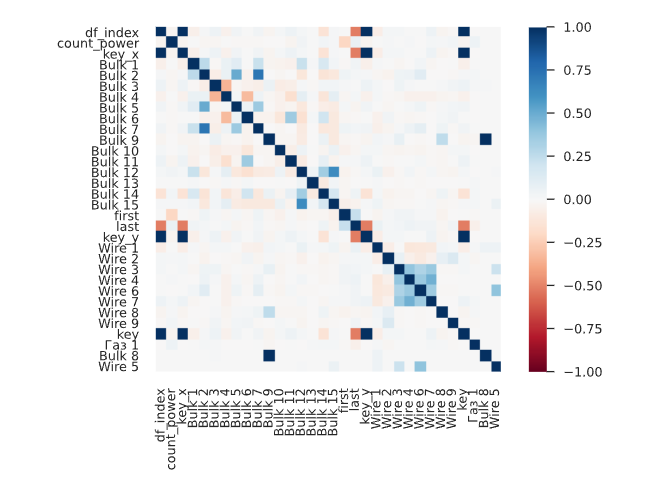

# Выводы по корреляции 

1. Заметили, что признак Bulk 9 довольно сильно коррелирует с Bulk 8
2. Заметили, что признаки  Wire 2 - Wire 8 коррелирует между собой в степени ближе к ~0.5

In [48]:
X = df.drop(['index', 
             'key', 
             'last', 
             'Bulk 8', 
             'Bulk 9', 
             'Bulk 2', 
             'Bulk 7', 
             'Bulk 12', 
             'Bulk 15', 
             'Реактивная мощность', 
             'Bulk 3', 
             'Bulk 4', 
             'Wire 2', 
             'Wire 3', 
             'Wire 4', 
             'Wire 5', 
             'Wire 6', 
             'Wire 7', 
             'Wire 8', 
             'Длительность', 
             'Активная мощность'], axis=1)

y = df['last']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=13022023)

# Выведем наши признаки, - которые мы отобрали

In [50]:
print("Фичи:", X_train.columns)

Фичи: Index(['Работа', 'Bulk 1', 'Bulk 5', 'Bulk 6', 'Bulk 10', 'Bulk 11', 'Bulk 13',
       'Bulk 14', 'first', 'Wire 1', 'Wire 9', 'Газ 1'],
      dtype='object')


### Проверим корретность разделения наших выборок

In [51]:
print("Размер тренировочного датасета:", X_train.shape)

print("Размер тестового датасета:",X_test.shape)

Размер тренировочного датасета: (1746, 12)
Размер тестового датасета: (583, 12)


****

### 3. Построение и подготовка моделей

### Создадим метрику - MAE для cross_val_score

In [52]:
def mae(target, predictions):
    mae = (abs(target - predictions)).sum() / len(target)
    return mae

custom_score = make_scorer(mae, greater_is_better=False) 

# Baseline модель

In [53]:
baseline = DummyRegressor(strategy='mean').fit(X_train, y_train)

baseline_predicted = baseline.predict(X_test)

mae_baseline = mean_absolute_error(y_test, baseline_predicted)

print("MAE-baseline:", mae_baseline)

MAE-baseline: 7.91021968370733


# Linear Regression

In [54]:
model_lin_rerg = LinearRegression() 

pipeline = make_pipeline(StandardScaler(), model_lin_rerg)

v_r = cross_val_score(pipeline, X_train, y_train,  cv=5, scoring=custom_score)

print("MAE-Линейной регресси по кросс-валидации:", (np.sum(v_r) / 5 *-1)) # усредним наши оценки 

MAE-Линейной регресси по кросс-валидации: 6.782596170175242


# Ridge (Linear Regression with L2)

In [55]:
model_lin_rerg = Ridge()

pipeline = make_pipeline(StandardScaler(), model_lin_rerg)

v_r = cross_val_score(pipeline, X_train, y_train,  cv=5, scoring=custom_score)

print("MAE-Линейной регресси по кросс-валидации:", (np.sum(v_r) / 5 *-1)) # усредним наши оценки 

MAE-Линейной регресси по кросс-валидации: 6.7828070907047175


# Lasso (Linear Regression with L1)

In [56]:
model_lin_rerg = Lasso()

pipeline = make_pipeline(StandardScaler(), model_lin_rerg)

v_r = cross_val_score(pipeline, X_train, y_train,  cv=5, scoring=custom_score)

print("MAE-Линейной регресси по кросс-валидации:", (np.sum(v_r) / 5 *-1)) # усредним наши оценки 

MAE-Линейной регресси по кросс-валидации: 7.056674580649267


# Support Vector Machine (SVM)

In [57]:
regr = svm.SVR()

pipeline = make_pipeline(StandardScaler(), regr)

v_r = cross_val_score(pipeline, X_train, y_train,  cv=5, scoring=custom_score)

print("MAE-Линейной регресси по кросс-валидации:", (np.sum(v_r) / 5 *-1)) # усредним наши оценки 

MAE-Линейной регресси по кросс-валидации: 6.6161216622812375


# Модель CatboostRegressor 

In [58]:
%%time  

model_gs_final = CatBoostRegressor(random_state=13022023, verbose=False)

parametrs  = {'n_estimators' : [100, 200, 300, 400],
              'max_depth' : [2, 4, 6, 8],
              'learning_rate' : [0.01, 0.05, 0.1, 0.2]
             
}

gs = GridSearchCV(estimator=model_gs_final, param_grid = parametrs, cv=5, scoring=custom_score)

search_model = gs.fit(X_train, y_train)
# 
print("GridSearchCV (CatBoostRegressor)")

print(f"Получили лучшие гиперпараметры: {search_model.best_params_} - их и будем использовать как лучшие") 

print("best_score_", round(search_model.best_score_ * -1, 2))

# Wall time: 5min 35s

GridSearchCV (CatBoostRegressor)
Получили лучшие гиперпараметры: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 400} - их и будем использовать как лучшие
best_score_ 6.18
CPU times: user 2min 9s, sys: 6.43 s, total: 2min 15s
Wall time: 5min 42s


****

### 4. Тестирование оптимальной модели

In [59]:
model_optim_test = CatBoostRegressor(random_state=13022023,
                                     max_depth=6, 
                                     n_estimators=400, 
                                     learning_rate=0.05,
                                     verbose=False)

model_optim_test.fit(X_train, y_train)

test_optim_predict = model_optim_test.predict(X_test)

print("MAE-лучшей модели", round(mean_absolute_error(y_test, test_optim_predict), 2))

# VERSION_01: MAE-лучшей модели 6.051801779299923


MAE-лучшей модели 6.05


****

# ОТЧЕТ по проекту

1. В ходе проведения исследовательского анализа данных, в проекте был сформирован план (алгоритм) по решению поставленной задачи заказчика. А именно были сформированы следующие пункты:

    1. После предобработки (избавление от пропусков и создания новых фичей по необходимости) данных следует подготовить тренировочную и тестовую выборки и по необходимости стандартизировать признаки и убрать ненужные, выберем соотношение **75:25** - чтобы для теста использовать 25 % наших данных

   2. Следует ввести **baseline** (по среднему) модель, с целью сравненения ее метрики с более продвинутыми моделями регрессиями (**CatBoostRegressor**, **LinearRegressor**). В качестве метрики будет использоваться **MAE**. Если baseline модель будет давать лучшую оценку в сравнении, то следует задуматься об выборе ее в качестве более простого алгоритма (модели)

   3. Следует провести **кросс-валидацию** (**GridSearch**) с целью отбора гиперпараметров для модели и отбора лучшей модели

   4. Провести **тестирование** отобранной лучшей модели и тем самым проверить ее на адекватность 
   
   5. **Предоставить финальный отчет** об проекте с конечными выводами


    Примечание: В качестве выбранной метрики для оценки качества моделей, можно парралельно смотреть на другую метрику - MSE
    
  
**Исходя из проделанной работы выше, - можно утверджать то, что все основные пункты были выполнены. Однако мы в дальнейшем использовали больши моделей - SVM, Lasso и Ridge.**



2. В ходе работе основная сложность была в том, чтобы объединить наши данные, - перед этим предварительно их обработав и создав необходимые новые признаки. - для преодоления этой проблемы мы использовали метод fiilna(0) и обосновали корретность замены пропусков, а также создали новые признака (Длительность, Работа), и приведения признака Работа к числовому. После чего сложность была в том, что отобрать те признаки, которые не коррелируют между собой, чтобы наша метрика была корректна как и обучение моделей. Для того чтобы отобрать наиболее значимые признаки, в качестве альтернатив для  рассмотрения был принцип метода главных компонент, объясненной дисперсии данных и корреляция (получить быстро можно было с ProfileReport). Мы решили проверить только корреляцию наших данных с помощью методы ProfileReport. После этой самой значимой трудности, - дальнейшая работа сопровождалась в соотвествии с планом.


3. Ключевые шаги состояли в том, чтобы выделить новые признаки и корректно подготовить наши данные. Вследствии чего стало понятным, что данные ниленейны и что важным и ключевым аспектом является отбор гиперпараметров для моделей основанных на бустинге. 



4. Признаки, которые мы использовали для обучения и тестирования моделей были следуюющими:

**'Работа',  'Bulk 1',  'Bulk 5',  'Bulk 6',  'Bulk 10',  'Bulk 11',  'Bulk 13', 'Bulk 14',  'first',  'Wire 1', 'Wire 9',  'Газ 1'**

    То есть те признаки, которые не коррелируют между собой, и тот признак, который мы создали сами - Работа. В качестве целевого была последняя температура, а первая измеренная была использована в качестве также признака.



5. В итоге наша модель - это популярный и мощный алгоритм основанный на бустинге - Catboost. Выбрали для нашей задачи  CatboostRegressor со следующими гиперпараметрами:

 **learning_rate': 0.05,**
 
 **'max_depth': 6,**
 
 **'n_estimators': 400**
 
 **'random_state': 13022023** 
 
 
6. Оценки MAE модели на трейни и тесте были соотвественно следующими:  

**6.18  И  6.05**

